# 1. 梯度下降法

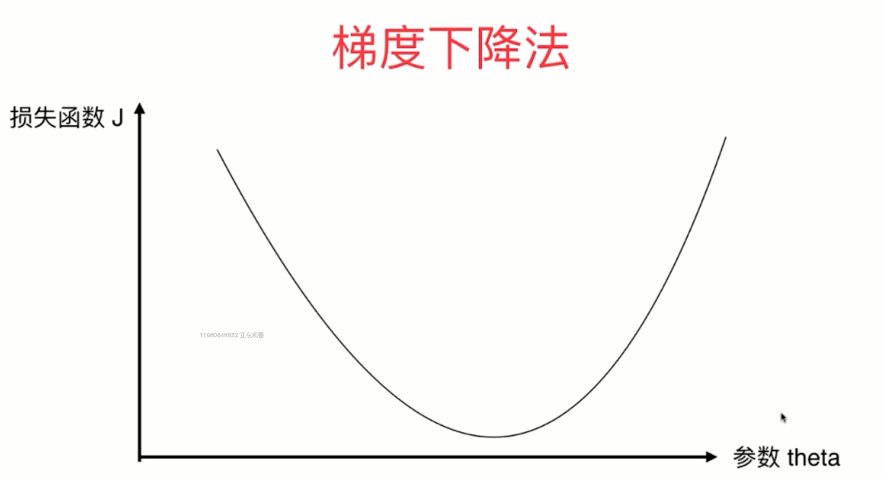

In [1]:
import numpy as np
import matplotlib.pylab as plt

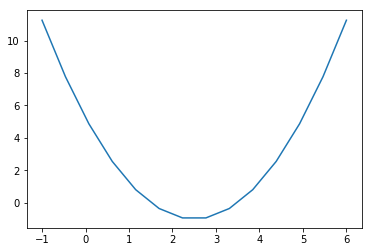

In [2]:
plot_x = np.linspace(-1,6,14)
plot_y = (plot_x-2.5)**2-1
plt.plot(plot_x,plot_y)

In [3]:
def dJ(theta):
    return 2*(theta-2.5)

In [4]:
def J(theta):
    try:
        return  (theta-2.5)**2-1
    except:
        return float('Inf')


2.499891109642585
-0.99999998814289


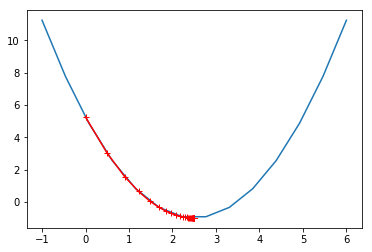

In [5]:
eta =0.1
theta = 0
epsilon = 1e-8
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta*dJ(theta)
    theta_history.append(theta)
    if abs(J(last_theta) - J(theta)) < epsilon:
        break
print(theta)
print(J(theta))
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),'r-+')

In [6]:
np.array(theta_history).shape

(46,)

In [7]:
def gradient_descent(initial_theta,eta, n_iters =10000,epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(theta)
    i_iters =0
    while i_iters < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        if abs(J(last_theta) - J(theta)) < epsilon:
            break
        i_iters += 1    
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),'r-+')

424

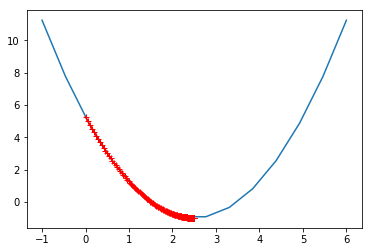

In [8]:
eta = 0.01
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()
len(theta_history)

# 2. 多元线性回归中的梯度下降法

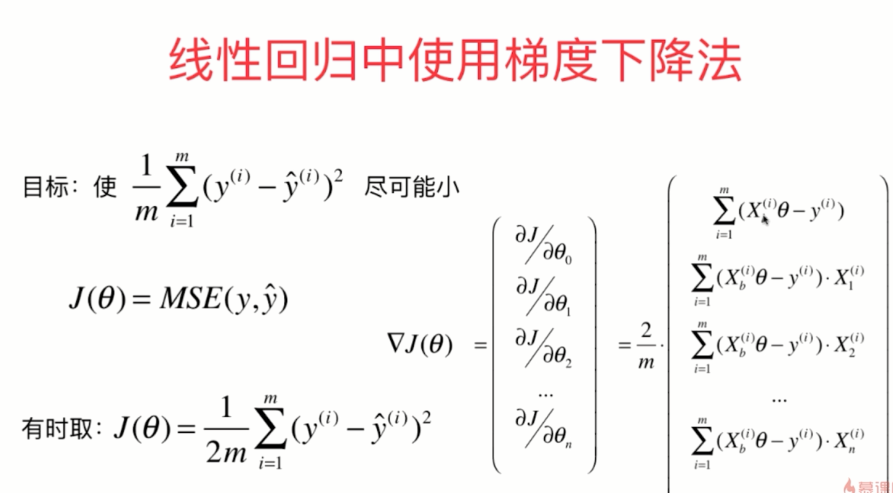

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = 2* np.random.random(size = 100)
y = x*3+4+np.random.normal(0,1,100)

In [10]:
X = x.reshape(-1,1)

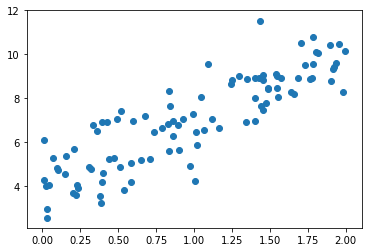

In [11]:
plt.scatter(x,y)

### 2.1 使用梯度下降法

In [12]:
def J(theat,X_b,y): ## 计算损失函数
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [13]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i] = ((X_b.dot(theta)-y)).dot(X_b[:,i])
    return res*2/len(X_b)

In [14]:
def gradient_descent(X_b,y,initial_theta,eta, n_iters =1e4,epsilon = 1e-8):
    theta = initial_theta
    i_iters =0
    while i_iters < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta*gradient
        if abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon:
            break
        i_iters +=1
    return theta

In [15]:
X_b = np.hstack([np.ones([len(X),1]),X]) 
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b,y,initial_theta,eta) 

In [16]:
theta

array([4.02369667, 3.00517447])

### 2.2 封装好的梯度下降法 计算回归模型

In [17]:
from playML.LinearRegression import LinearRegression

In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit_gd(X,y)

LinearRegression()

In [20]:
lin_reg.coef_

array([3.00706277])

In [21]:
lin_reg.interception_

4.021457858204859

# 3. 随机梯度下降法

In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
m= 10000
x = 2* np.random.random(size = m)
X = x.reshape(-1,1)
y = x*4+3+np.random.normal(0,1,m)

In [23]:
def J(theta,X_b,y): ## 计算损失函数
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')
        
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i] = ((X_b.dot(theta)-y)).dot(X_b[:,i])
    return res*2/len(X_b)

def gradient_descent(X_b,y,initial_theta,eta, n_iters =1e4,epsilon = 1e-8):
    theta = initial_theta
    i_iters =0
    while i_iters < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta*gradient
        if abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon:
            break
        i_iters +=1
    return theta

In [24]:
%%time 
X_b = np.hstack([np.ones([len(X),1]),X]) 
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b,y,initial_theta,eta) 

Wall time: 479 ms


In [25]:
theta

array([2.98629641, 4.00381962])

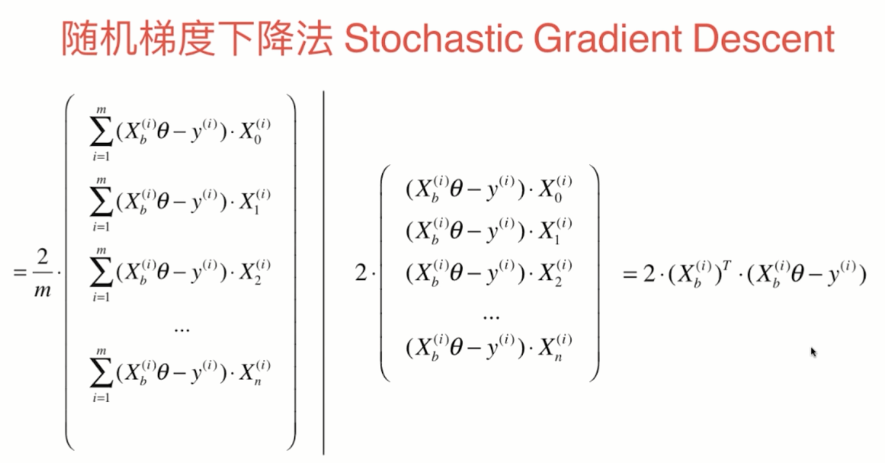

In [26]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta)-y_i)*2.0 ##  下降的趋势

def sgd(X_b,y,initial_theta,n_iters):
    
    def learning_rate(t):
        return 5 / (t + 50)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i]) ## 只需要找其中的一个theta降的趋势找
        theta = theta - learning_rate(cur_iter) * gradient
    return theta    

In [27]:
%%time
X_b = np.hstack([np.ones([len(X),1]),X]) 
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,y,initial_theta,n_iters = len(X_b//3)) ##时间还是很厉害的

Wall time: 83.2 ms


In [28]:
theta

array([2.98718626, 3.99973272])

In [29]:
from playML.LinearRegression import LinearRegression

In [30]:
%%time
lin_reg_sgd = LinearRegression()
lin_reg_sgd.fit_sgd(X,y,n_iters=2)


Wall time: 104 ms


In [31]:
lin_reg_sgd.coef_

array([3.99148356])

In [32]:
lin_reg_sgd.interception_

2.981168370451121

### 3.1 真实的使用我们自己的SGD

In [33]:
from sklearn import datasets
from playML.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
boston = datasets.load_boston()

In [34]:
X = boston.data
y = boston.target

In [35]:
X = X[y<50]
y = y[y<50]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.2,seed= 666)

In [37]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_train_standard = standarScaler.transform(X_train)
X_test_standard = standarScaler.transform(X_test)

In [39]:
lin_reg_sgd = LinearRegression()
%time lin_reg_sgd.fit_sgd(X_train_standard ,y_train,n_iters=50)
lin_reg_sgd.score(X_test_standard,y_test)

Wall time: 99.1 ms


0.8130745017877812

### 3.2 scikit-learn 中的SGD

In [40]:
from sklearn.linear_model import SGDRegressor

In [41]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

Wall time: 10.9 ms


d:\software\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8054156404011494

# 4. 如何调试梯度

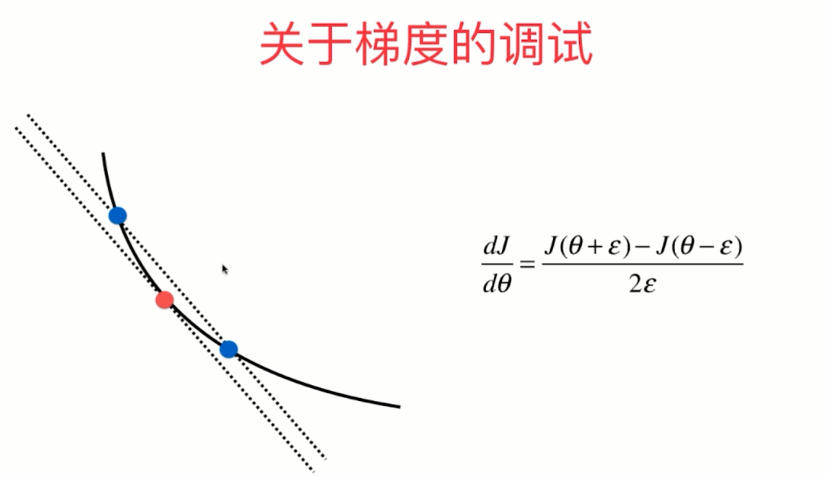

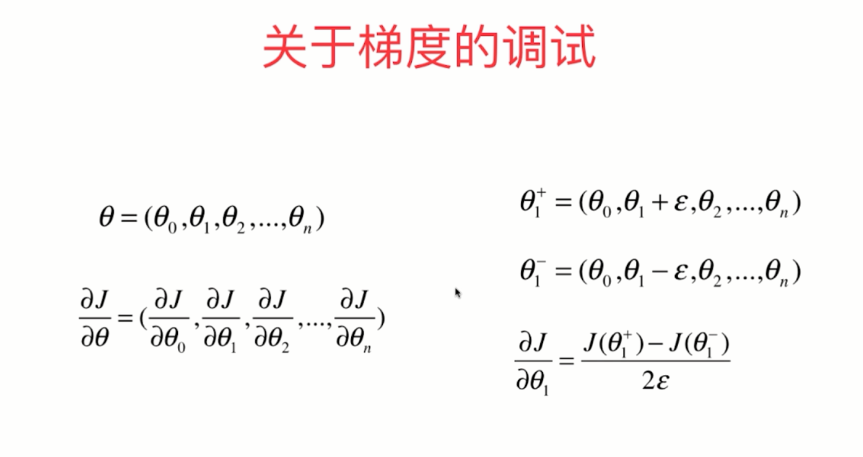

In [42]:
import numpy as np
import matplotlib.pylab as plt

In [43]:
np.random.seed(666)
X = np.random.random(size = (1000,10))
true_theta = np.arange(1,12,dtype = float)

In [44]:
X_b = np.hstack([np.ones((len(X),1)),X])
y = X_b.dot(true_theta)+np.random.normal(0,1,size = 1000)

In [45]:
print(X.shape)
print(y.shape)
true_theta

(1000, 10)
(1000,)


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [46]:
def J(theta,X_b,y): ## 计算损失函数,就是一般的 y 方程
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [47]:
def dJ_math(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta)-y)*2.0/len(y) ##  下降的趋势

In [48]:
def dJ_debug(theta,X_b,y,epslion = 0.01):  ##对每一个 theta ，进行调试得到结果，然后进行优化
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epslion
        theta_2 = theta.copy()
        theta_2[i] -= epslion 
        res[i] = (J(theta_1,X_b,y) - J(theta_2,X_b,y))/(2*epslion)
    return res

In [49]:
def gradient_descent(dJ,X_b,y,initial_theta,eta, n_iters =1e4,epsilon = 1e-8):
    theta = initial_theta
    i_iters =0
    while i_iters < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta*gradient
        if abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon:
            break
        i_iters +=1
    return theta

In [50]:
%%time
X_b = np.hstack([np.ones([len(X),1]),X]) 
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(dJ_math,X_b,y,initial_theta,eta) 

Wall time: 1.85 s


In [51]:
theta

array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [52]:
%%time
X_b = np.hstack([np.ones([len(X),1]),X]) 
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(dJ_debug,X_b,y,initial_theta,eta) 

Wall time: 12.3 s


In [53]:
theta

array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])